## Data Preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("metaverse_transactions_dataset.csv")

In [3]:
df.head()

timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [5]:
df.columns

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')

In [6]:
df.describe()

hour_of_day        amount     ip_prefix  login_frequency  \
count  78600.000000  78600.000000  78600.000000     78600.000000   
mean      11.532634    502.574903    147.644430         4.178702   
std        6.935897    245.898146     69.388143         2.366038   
min        0.000000      0.010000     10.000000         1.000000   
25%        6.000000    331.319966    172.000000         2.000000   
50%       12.000000    500.029500    172.160000         4.000000   
75%       18.000000    669.528311    192.000000         6.000000   
max       23.000000   1557.150905    192.168000         8.000000   

       session_duration    risk_score  
count      78600.000000  78600.000000  
mean          69.684606     44.956722  
std           40.524476     21.775365  
min           20.000000     15.000000  
25%           35.000000     26.250000  
50%           60.000000     40.000000  
75%          100.000000     52.500000  
max          159.000000    100.000000

In [7]:
df['timestamp']=pd.to_datetime(df['timestamp'])


In [8]:
df = df.drop_duplicates(subset =  None , keep  = 'first', inplace = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          78600 non-null  datetime64[ns]
 1   hour_of_day        78600 non-null  int64         
 2   sending_address    78600 non-null  object        
 3   receiving_address  78600 non-null  object        
 4   amount             78600 non-null  float64       
 5   transaction_type   78600 non-null  object        
 6   location_region    78600 non-null  object        
 7   ip_prefix          78600 non-null  float64       
 8   login_frequency    78600 non-null  int64         
 9   session_duration   78600 non-null  int64         
 10  purchase_pattern   78600 non-null  object        
 11  age_group          78600 non-null  object        
 12  risk_score         78600 non-null  float64       
 13  anomaly            78600 non-null  object        
dtypes: dat

In [9]:
df=df.drop(['sending_address', 'receiving_address'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         78600 non-null  datetime64[ns]
 1   hour_of_day       78600 non-null  int64         
 2   amount            78600 non-null  float64       
 3   transaction_type  78600 non-null  object        
 4   location_region   78600 non-null  object        
 5   ip_prefix         78600 non-null  float64       
 6   login_frequency   78600 non-null  int64         
 7   session_duration  78600 non-null  int64         
 8   purchase_pattern  78600 non-null  object        
 9   age_group         78600 non-null  object        
 10  risk_score        78600 non-null  float64       
 11  anomaly           78600 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 7.2+ MB


In [10]:
df  =  df.dropna()
df.head()

timestamp  hour_of_day      amount transaction_type  \
0 2022-04-11 12:47:27           12  796.949206         transfer   
1 2022-06-14 19:12:46           19    0.010000         purchase   
2 2022-01-18 16:26:59           16  778.197390         purchase   
3 2022-06-15 09:20:04            9  300.838358         transfer   
4 2022-02-18 14:35:30           14  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

In [11]:
transaction = df['transaction_type'].value_counts()
transaction

transaction_type
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

In [12]:
import plotly.express as px

px.violin(data_frame=df, x='risk_score', y='anomaly', box=True)

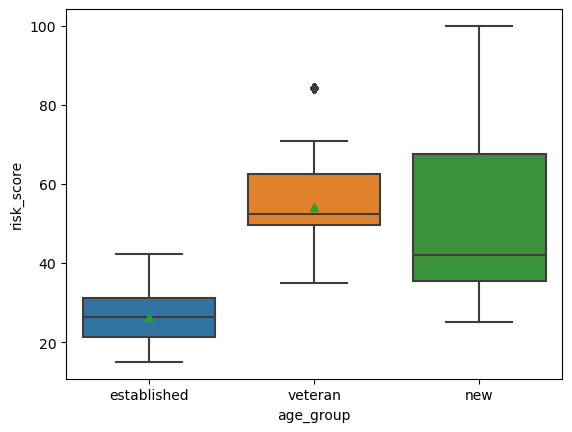

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has a categorical column 'category' and a numerical column 'value'
sns.boxplot(x = "age_group", y = "risk_score", showmeans=True, data=df)
plt.show()

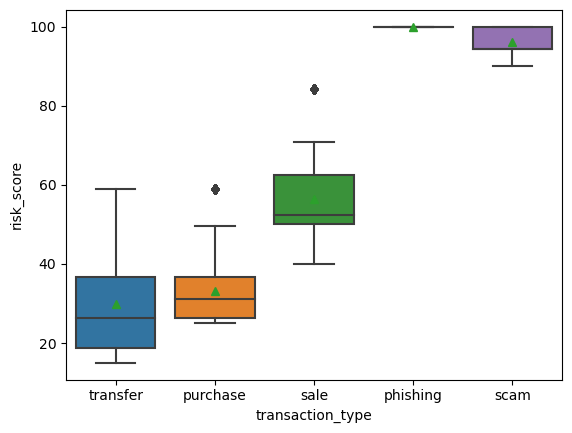

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has a categorical column 'category' and a numerical column 'value'
sns.boxplot(x = "transaction_type", y = "risk_score", showmeans=True, data=df)
plt.show()

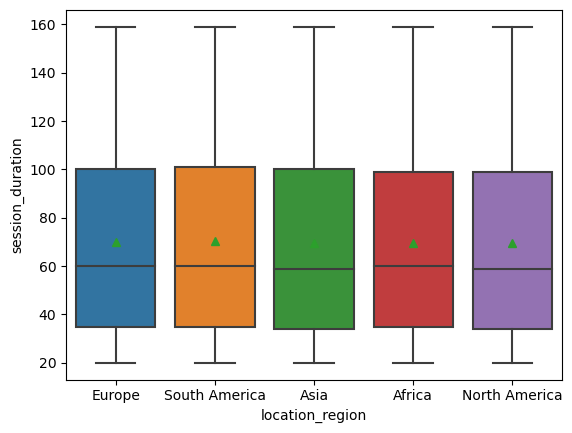

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has a categorical column 'category' and a numerical column 'value'
sns.boxplot(x = "location_region", y = "session_duration", showmeans=True, data=df)
plt.show()

In [16]:
cols=['hour_of_day', 'amount', 'transaction_type', 'location_region','login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly']
len(cols)

10

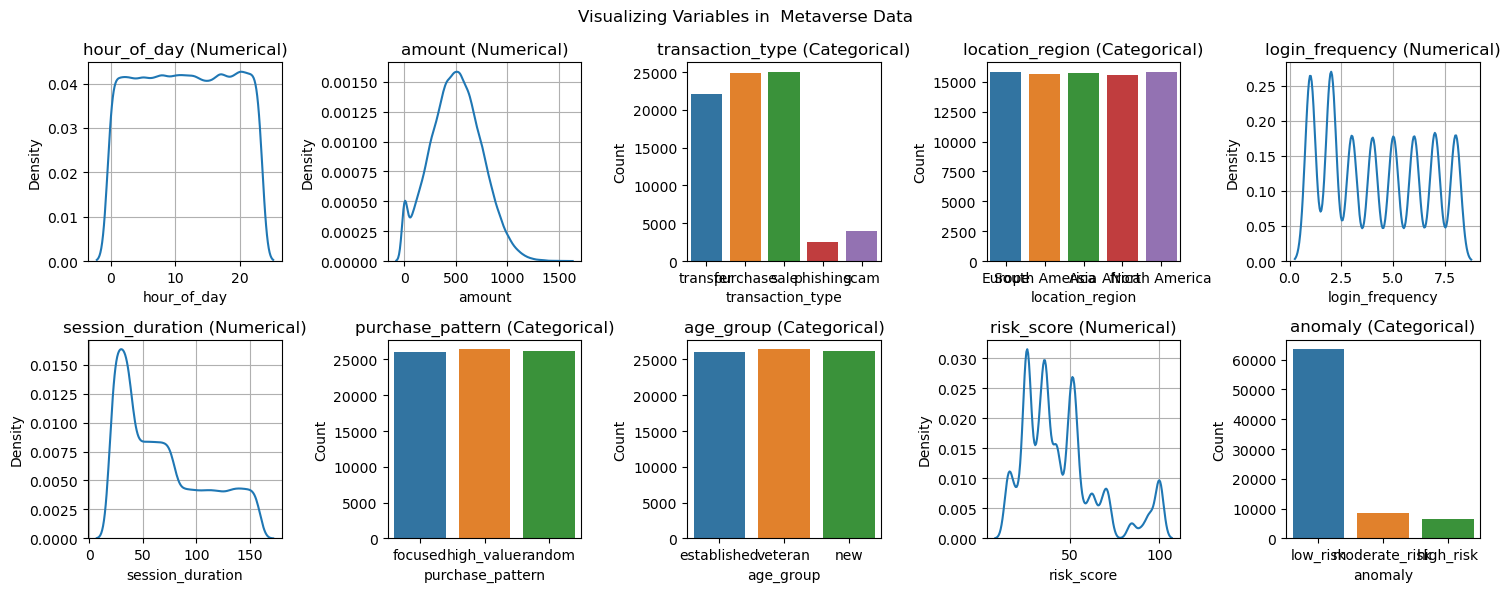

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['hour_of_day', 'amount', 'transaction_type', 'location_region',
        'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
        'risk_score', 'anomaly']

# Create a figure with appropriate layout
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Visualizing Variables in  Metaverse Data")

# Iterate through columns and create plots
for i, col in enumerate(cols):
    ax = axes.flat[i]  # Get the current axis

    if df[col].dtype == 'object':  # Categorical data
        sns.countplot(x=df[col], ax=ax)
        ax.set_title(f"{col} (Categorical)")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
    else:  # Numerical data
        sns.kdeplot(df[col], ax=ax)
        ax.set_title(f"{col} (Numerical)")
        ax.set_xlabel(col)
        ax.set_ylabel("Density")
        ax.grid(True)

# Fine-tune layout and display
plt.tight_layout()
plt.show()

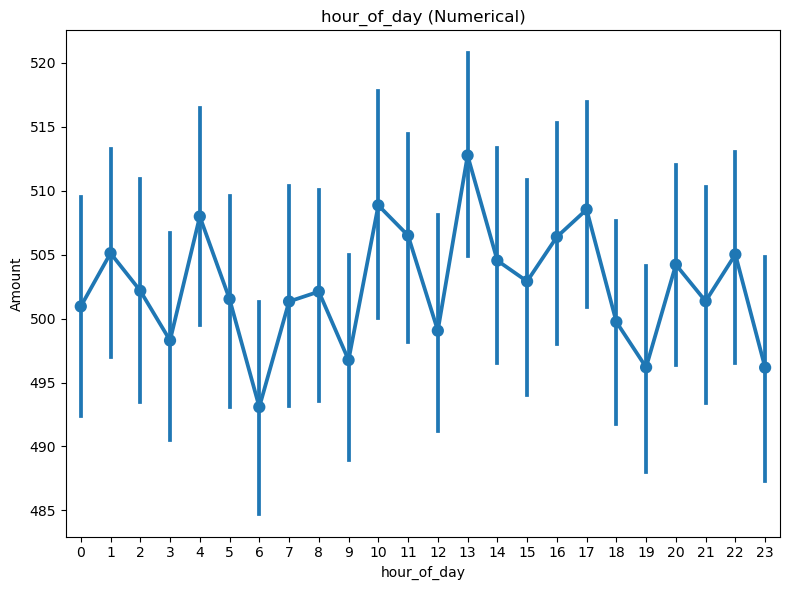

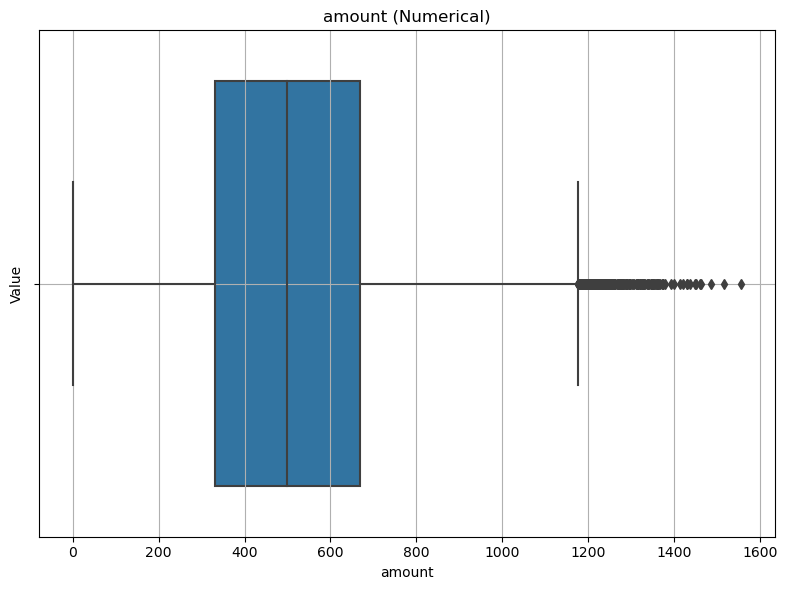

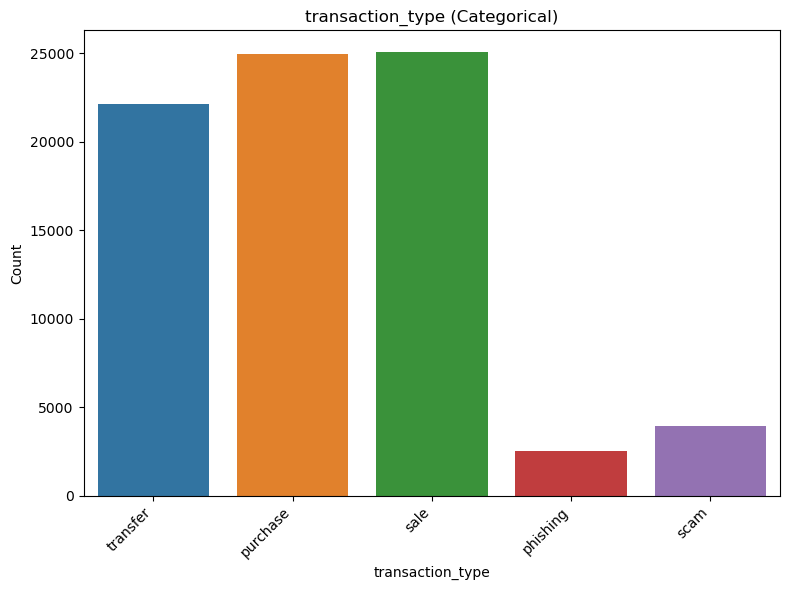

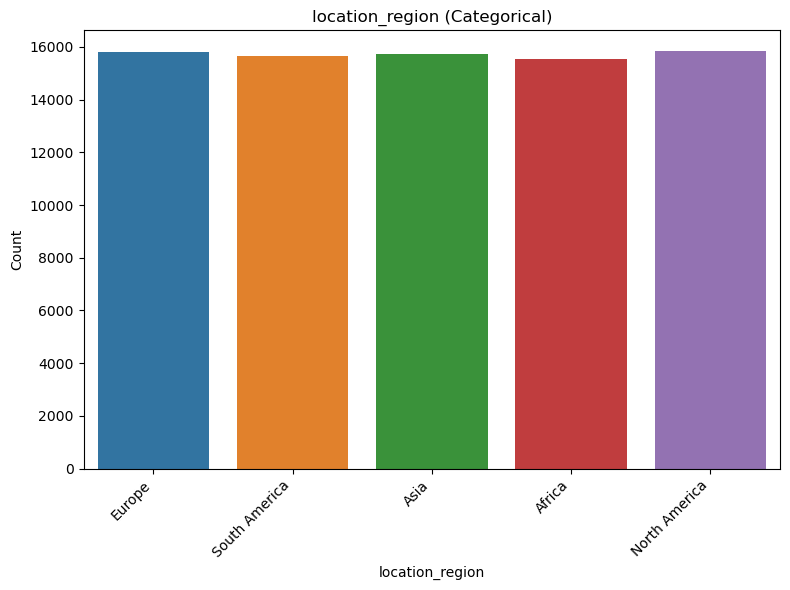

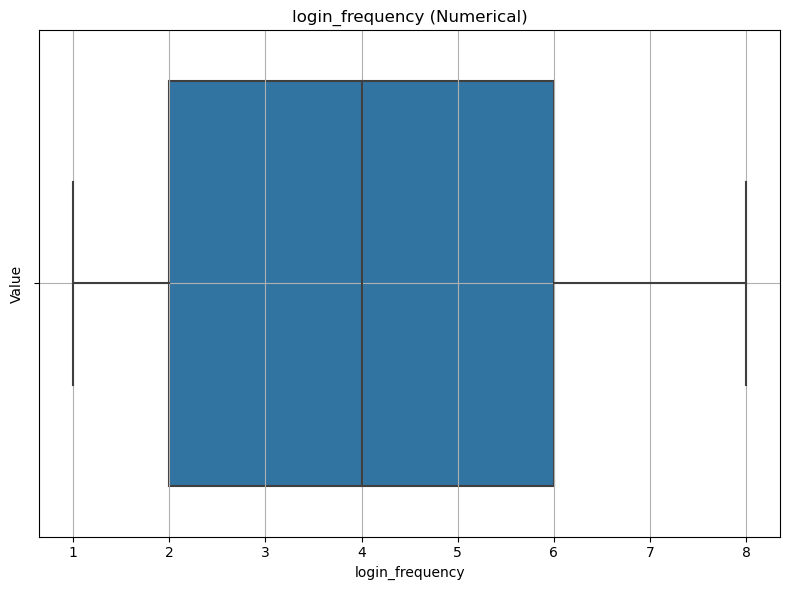

C:\Users\prudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\prudh\AppData\Local\Temp\ipykernel_37560\3990990600.py:38: UserWarning:

The figure layout has changed to tight



<Figure size 800x600 with 0 Axes>

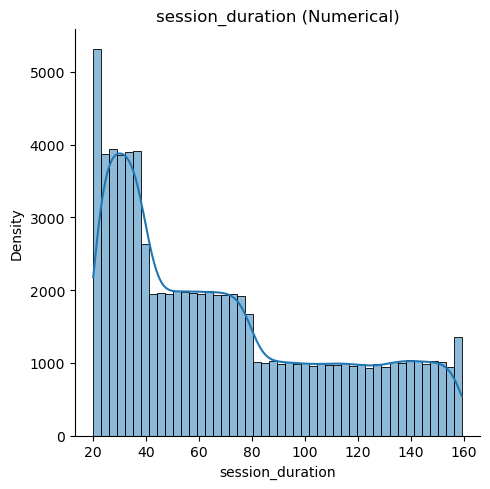

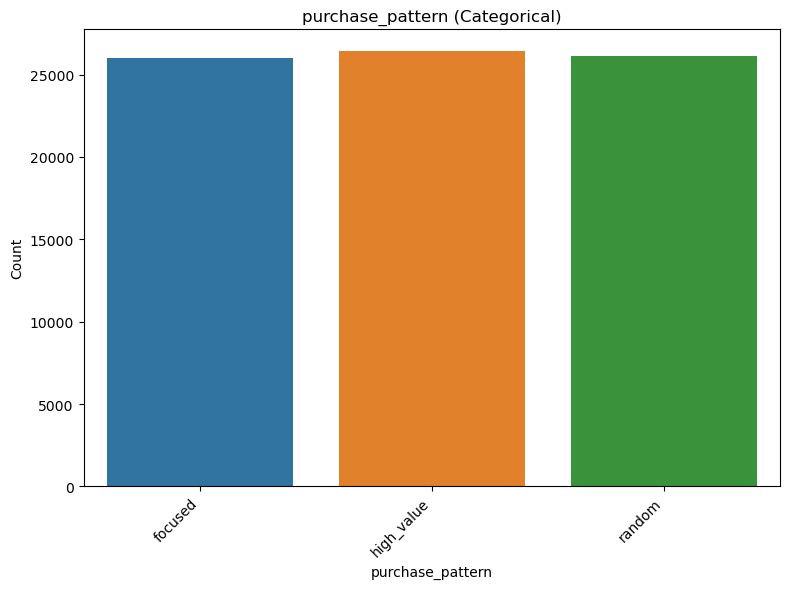

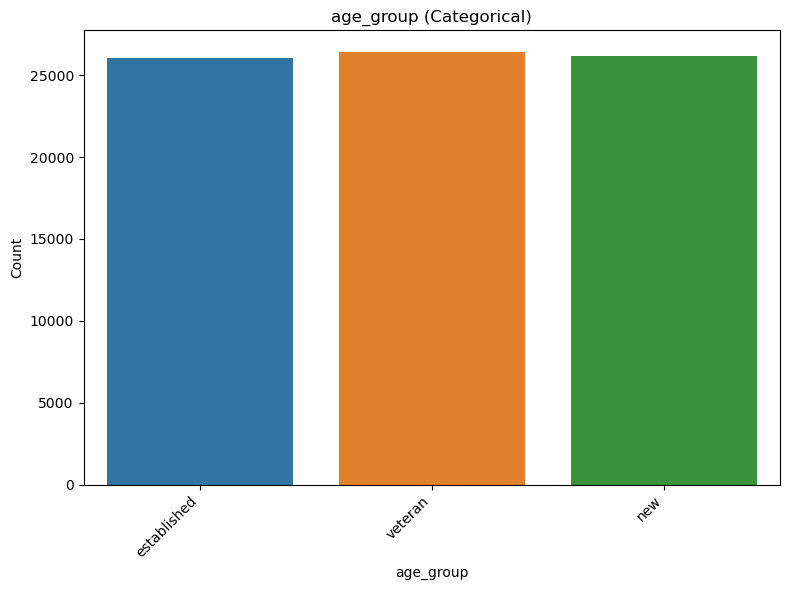

C:\Users\prudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\prudh\AppData\Local\Temp\ipykernel_37560\3990990600.py:38: UserWarning:

The figure layout has changed to tight



<Figure size 800x600 with 0 Axes>

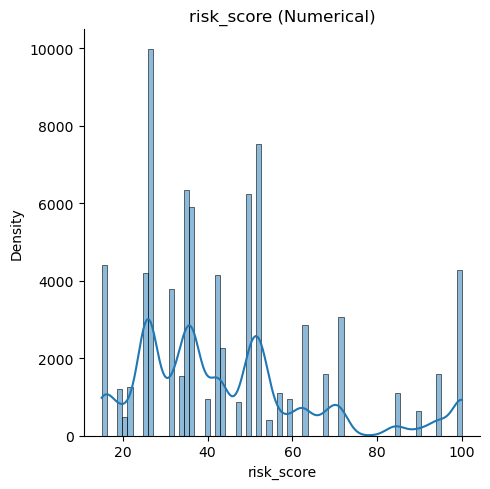

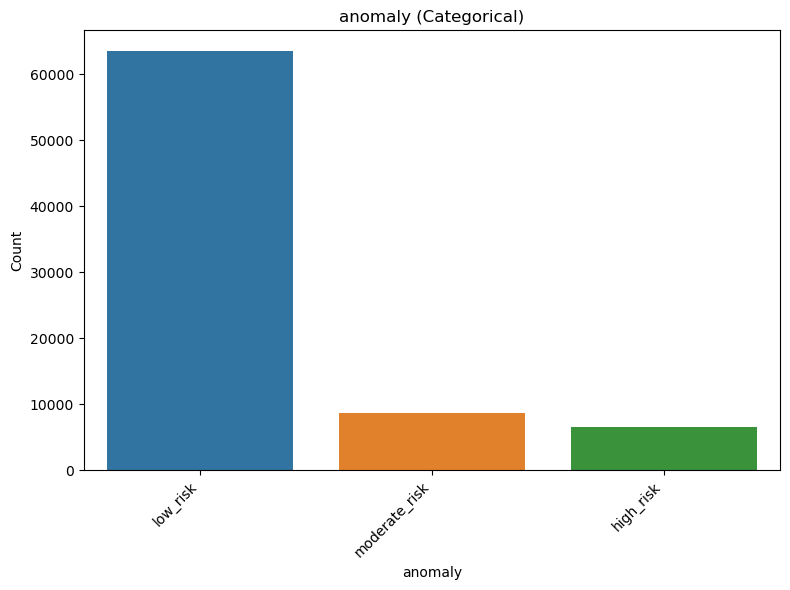

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['hour_of_day', 'amount', 'transaction_type', 'location_region',
        'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
        'risk_score', 'anomaly']

for col in cols:
    plt.figure(figsize=(8, 6))  # Create a separate figure for each column

    if df[col].dtype == 'object':  # Categorical data
        sns.countplot(x=df[col])
        plt.title(f"{col} (Categorical)")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')  # Rotate category labels for readability
    else:  # Numerical data
        # Choose a suitable plot based on data characteristics
        if (col == 'hour_of_day'):  # Cyclical data
            # Corrected `kind` argument for compatibility with newer Seaborn versions
            sns.pointplot(x=df[col], y=df['amount'])  # Show daily pattern with markers
            plt.title(f"{col} (Numerical)")
            plt.xlabel(col)
            plt.ylabel("Amount")
        elif (col in ['session_duration', 'risk_score']):  # Potentially skewed data
            sns.displot(df[col], kde=True)  # Distribution with density estimation
            plt.title(f"{col} (Numerical)")
            plt.xlabel(col)
            plt.ylabel("Density")
        else:  # Other numerical data (adjust as needed)
            sns.boxplot(x=df[col])
            plt.title(f"{col} (Numerical)")
            plt.xlabel(col)
            plt.ylabel("Value")
            plt.grid(True)

    plt.tight_layout()
    plt.show()  # Display the plot for each column
    plt.close()  # Close the figure after display


<Axes: xlabel='transaction_type'>

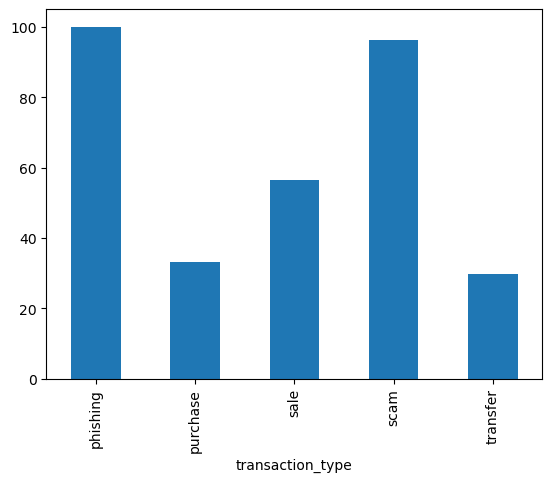

In [19]:
df.groupby('transaction_type')['risk_score'].mean().plot(kind ='bar')

<Axes: xlabel='hour_of_day'>

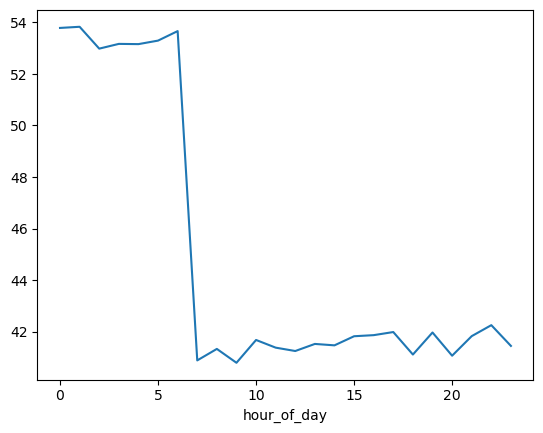

In [20]:
df.groupby('hour_of_day')['risk_score'].mean().plot(kind ='line')

<Axes: xlabel='age_group'>

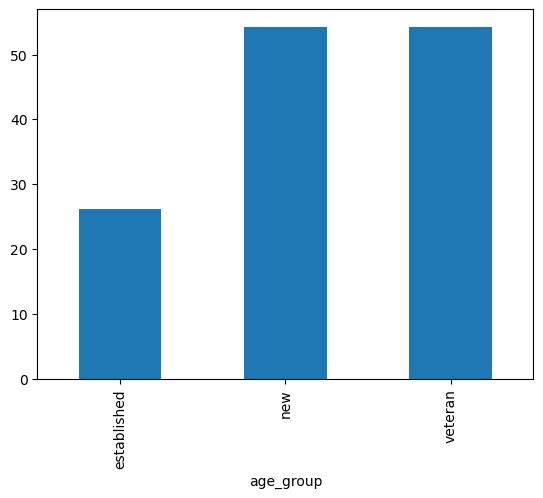

In [21]:
df.groupby('age_group')['risk_score'].mean().plot(kind ='bar')

In [22]:
df.head()

timestamp  hour_of_day      amount transaction_type  \
0 2022-04-11 12:47:27           12  796.949206         transfer   
1 2022-06-14 19:12:46           19    0.010000         purchase   
2 2022-01-18 16:26:59           16  778.197390         purchase   
3 2022-06-15 09:20:04            9  300.838358         transfer   
4 2022-02-18 14:35:30           14  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

In [23]:
df = df.drop_duplicates(subset =  None , keep  = 'first', inplace = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         78600 non-null  datetime64[ns]
 1   hour_of_day       78600 non-null  int64         
 2   amount            78600 non-null  float64       
 3   transaction_type  78600 non-null  object        
 4   location_region   78600 non-null  object        
 5   ip_prefix         78600 non-null  float64       
 6   login_frequency   78600 non-null  int64         
 7   session_duration  78600 non-null  int64         
 8   purchase_pattern  78600 non-null  object        
 9   age_group         78600 non-null  object        
 10  risk_score        78600 non-null  float64       
 11  anomaly           78600 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 7.2+ MB


## K-Means Clustering

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline






In [25]:
#preprocessing for numerical and categorical data
numerical_features = ['amount', 'ip_prefix', 'login_frequency', 'session_duration', 'risk_score']
categorical_features = ['transaction_type', 'location_region', 'age_group']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])




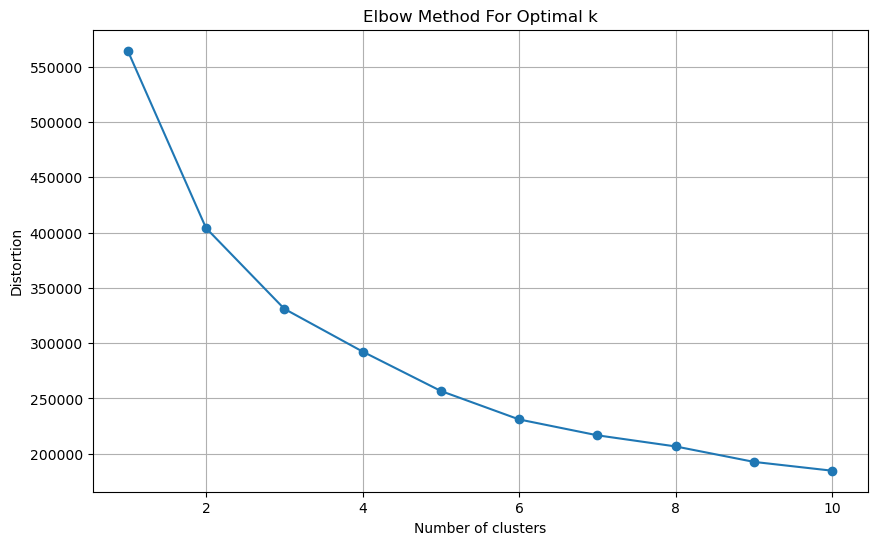

In [26]:
X_transformed = preprocessor.fit_transform(df)

# Calculate distortions for a range of number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=300)
    km.fit(X_transformed)
    distortions.append(km.inertia_)

# Plot the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### 4 Clusters

In [27]:
# Pipeline with preprocessing and clustering
cluster_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('clusterer', KMeans(n_clusters=4, random_state=42))])


In [28]:
cluster_pipeline.fit(df)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'ip_prefix',
                                                   'login_frequency',
                                                   'session_duration',
                                                   'risk_score']),
                                                 ('cat', OneHotEncoder(),
                                                  ['transaction_type',
                                                   'location_region',
                                                   'age_group'])])),
                ('clusterer', KMeans(n_clusters=4, random_state=42))])

In [29]:
labels = cluster_pipeline['clusterer'].labels_

In [30]:
df['Cluster'] = labels


In [31]:
centers = cluster_pipeline['clusterer'].cluster_centers_
print("Cluster centers:\n", centers)


print(df.head())

Cluster centers:
 [[ 1.05699533e-02 -8.78012471e-03 -1.12961583e+00 -9.91591896e-01
  -2.36093596e-01 -1.38777878e-16  3.39033079e-01  3.29923664e-01
   1.29063427e-15  3.31043257e-01  1.96590331e-01  2.01272265e-01
   1.99898219e-01  2.03206107e-01  1.99033079e-01 -1.55431223e-15
   1.00000000e+00 -1.16573418e-15]
 [-1.00471917e-03  1.60108669e-03  1.19368555e+00  1.22930455e+00
   4.25897481e-01  1.59594560e-15  6.93889390e-15  7.02331391e-01
   1.72084569e-15  2.97668609e-01  1.96805692e-01  1.99984861e-01
   1.99379305e-01  2.00931042e-01  2.02899099e-01 -1.60982339e-15
  -5.71764858e-15  1.00000000e+00]
 [ 3.68995358e-04 -1.19353262e-03 -7.64864220e-02 -2.51577866e-01
  -8.58208697e-01  1.51267887e-15  7.02108862e-01 -1.38222767e-14
   1.83880688e-15  2.97891138e-01  1.99247109e-01  1.98978220e-01
   2.06583951e-01  1.99131871e-01  1.96058848e-01  1.00000000e+00
  -5.38458167e-15  7.04991621e-15]
 [-2.93701230e-02  2.48339912e-02 -1.13186106e+00 -9.92544659e-01
   2.42154318e+00  

In [32]:
# Calculate summary statistics for numerical features by cluster
numerical_features = ['amount', 'ip_prefix', 'login_frequency', 'session_duration', 'risk_score']
cluster_summary_stats = df.groupby('Cluster')[numerical_features].agg([np.mean, np.std, np.min, np.max])

# Analyze the distribution of categorical variables within each cluster
categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'anomaly']
cluster_categorical_distribution = {feature: pd.crosstab(df[feature], df['Cluster']) for feature in categorical_features}

cluster_summary_stats, cluster_categorical_distribution['transaction_type'], cluster_categorical_distribution['location_region'], cluster_categorical_distribution['purchase_pattern'], cluster_categorical_distribution['anomaly']


(             amount                                  ip_prefix             \
                mean         std  amin         amax        mean        std   
 Cluster                                                                     
 0        505.174018  247.149916  0.01  1557.150905  147.035197  69.875370   
 1        502.327846  245.882447  0.01  1485.989339  147.755526  69.253019   
 2        502.665637  245.659523  0.01  1516.462988  147.561613  69.446437   
 3        495.352890  243.012623  0.01  1393.027468  149.367603  68.200001   
 
                        login_frequency                     session_duration  \
          amin     amax            mean       std amin amax             mean   
 Cluster                                                                       
 0        10.0  192.168        1.506005  0.499977    1    2        29.501120   
 1        10.0  192.168        7.002990  0.813589    6    8       119.501211   
 2        10.0  192.168        3.997734  0.818193   



### Cluster 0:
- **Transaction Amount**: Moderate average transaction amount with the smallest standard deviation, indicating similar transaction sizes.
- **IP Prefix**: Wide range of IP prefixes, suggesting diverse geographical locations or varied networks.
- **Login Frequency**: Lowest average, users typically log in once.
- **Session Duration**: Short average sessions, indicating quick interactions.
- **Risk Score**: Higher average risk score than Clusters 1 and 2 but lower than Cluster 3.
- **Transaction Type**: High counts of `purchase` and `sale` transactions, but no `phishing` or `scam`.
- **Location Region**: Even distribution across regions.
- **Purchase Pattern**: `Random` purchases are dominant in this cluster.
- **Anomaly**: Contains only `low_risk` and a few `moderate_risk` entries, but no `high_risk`.

### Cluster 1:
- **Transaction Amount**: Similar average amount to Cluster 0 but with slightly more variation.
- **IP Prefix**: Similar spread as Cluster 0.
- **Login Frequency**: Highest average, suggesting users here log in many times.
- **Session Duration**: Longest average sessions, indicating extensive interactions.
- **Risk Score**: Moderate average risk score.
- **Transaction Type**: Dominated by `sale` transactions with a significant number of `transfer` transactions; no `phishing` or `scam`.
- **Location Region**: Also evenly distributed across regions.
- **Purchase Pattern**: Exclusively `high_value` transactions.
- **Anomaly**: Primarily `low_risk` with a substantial number of `moderate_risk`; no `high_risk`.

### Cluster 2:
- **Transaction Amount**: Similar average amount to Clusters 0 and 1, with a standard deviation close to Cluster 1.
- **IP Prefix**: Comparable range to the other clusters.
- **Login Frequency**: Users log in a moderate number of times, less than Cluster 1 but more than Clusters 0 and 3.
- **Session Duration**: Moderate session lengths.
- **Risk Score**: Lowest average risk score, indicating the safest transactions.
- **Transaction Type**: Comprises only `purchase` transactions.
- **Location Region**: Distributed across all regions, similar to other clusters.
- **Purchase Pattern**: Solely `focused` purchase patterns.
- **Anomaly**: Entirely `low_risk`.

### Cluster 3:
- **Transaction Amount**: Lowest average amount and variability in transaction size.
- **IP Prefix**: Similar range as the other clusters but a slightly higher average, which may indicate a specific range of IP addresses.
- **Login Frequency**: Similar to Cluster 0, with infrequent logins.
- **Session Duration**: Comparable to Cluster 0, indicating quick sessions.
- **Risk Score**: Significantly higher risk score than other clusters, suggesting this group contains the riskiest transactions.
- **Transaction Type**: Contains all `phishing` and `scam` transactions and no others.
- **Location Region**: Lower counts across all regions, perhaps indicating fewer but riskier transactions.
- **Purchase Pattern**: Dominated by `random` patterns and the only cluster with `high_risk` anomalies.

### General Observations:
- Clusters 0 and 3 have similar login frequencies and session durations but are differentiated by the types of transactions and risk scores, with Cluster 3 containing all high-risk anomalies.
- Cluster 1 appears to be characterized by users who log in frequently and have long session durations, associated with high-value transactions.
- Cluster 2 is characterized by focused purchasers with the lowest risk score and no moderate or high-risk transactions.
- There is an interesting correlation between purchase patterns and risk scores, with random purchase patterns associated with higher risk scores and focused patterns with low risk scores.
- The type of transaction is a clear differentiator among the clusters, with some clusters being exclusive to certain transaction types.

In conclusion, each cluster represents a distinct user behavior pattern, and understanding these can help target user groups more effectively for marketing, customer service, and security monitoring.

In [33]:
df.head(5)

timestamp  hour_of_day      amount transaction_type  \
0 2022-04-11 12:47:27           12  796.949206         transfer   
1 2022-06-14 19:12:46           19    0.010000         purchase   
2 2022-01-18 16:26:59           16  778.197390         purchase   
3 2022-06-15 09:20:04            9  300.838358         transfer   
4 2022-02-18 14:35:30           14  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  Cluster  
0          focused  established       18.75       low_risk        2  
1          focused  established       25.00       low_risk        2  
2          focused  established       31.25       low_risk        2  
3       high_value      veteran       36.75       low_risk        1  
4       high_value      veteran       62.50  moderate_risk        1

## LOGISTIC REGRESSION

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


df = df.drop(columns=['ip_prefix', 'timestamp','risk_score','Cluster'])

# Encoding the 'anomaly' column
le = LabelEncoder()
df['anomaly'] = le.fit_transform(df['anomaly'])

class_mapping = {original_label: encoded_label for original_label, encoded_label in zip(le.classes_, le.transform(le.classes_))}
print(class_mapping)



X = df.drop('anomaly', axis=1)
y = df['anomaly']

categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
if len(le.classes_) == 2:  # Only compute ROC-AUC if it's a binary classification
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")



{'high_risk': 0, 'low_risk': 1, 'moderate_risk': 2}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.98      0.97      0.97     12848
           2       0.79      0.81      0.80      1621

    accuracy                           0.96     15720
   macro avg       0.92      0.93      0.92     15720
weighted avg       0.96      0.96      0.96     15720



C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression





- **Class 0**: The model is excellent at predicting class 0 with perfect precision and recall (both are 1.00), indicating that every instance predicted as class 0 is correct (precision), and all instances of class 0 are identified correctly (recall). The f1-score, which is the harmonic mean of precision and recall, is also 1.00, indicating a perfect balance between precision and recall for this class.

- **Class 1**: The model also performs well on class 1 with high precision (0.97) and recall (0.97), meaning it is very accurate in its predictions for this class, and the f1-score of 0.97 shows a strong balance between precision and recall. This is the predominant class, given the number of instances (12,848 out of 15,720).

- **Class 2**: The performance drops slightly for class 2, with a precision of 0.79 and a recall of 0.80. This means that 79% of instances predicted as class 2 are correct, and the model successfully identifies 80% of all actual instances of class 2. The f1-score of 0.79 indicates a good but not excellent performance for this class.

- **Accuracy**: The overall accuracy of the model is 0.96, which means that 96% of all predictions across all classes are correct.

- **Macro Average**: The macro average takes the average of the precision, recall, and f1-score without considering the imbalance in the dataset (i.e., each class is given equal weight). With a macro avg of 0.92 for both precision and recall, the model has good overall performance across all classes.

- **Weighted Average**: The weighted average takes into account the imbalance in the dataset. It calculates the average of precision, recall, and f1-score, with each class's metric weighted by its presence in the dataset. The high weighted average of 0.96 for precision, recall, and f1-score indicates the model is performing well overall, particularly on the predominant classes.

In summary, the model is very accurate for class 0 and class 1, which have a high number of instances, especially class 1. It is less accurate for class 2, which may be due to fewer training instances or higher complexity in distinguishing this class from the others. 

In [35]:
import numpy as np
import pandas as pd

# Get feature names for one-hot encoded categorical features
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine with the remaining numerical feature names
remaining_features = [col for col in df.columns if col not in categorical_features + ['anomaly']]
all_feature_names = np.concatenate([encoded_feature_names, remaining_features], axis=0)


if len(all_feature_names) == model.coef_.shape[1]:
    feature_importance = pd.DataFrame({'feature': all_feature_names, 'importance': model.coef_[0]})
    feature_importance.sort_values(by='importance', ascending=False, inplace=True)
    print(feature_importance)
else:
    print("Mismatch in the number of features and coefficients.")
print(all_feature_names)


                          feature  importance
2           transaction_type_scam    5.658781
9         purchase_pattern_random    2.953757
10                  age_group_new    2.953757
7   location_region_South America    0.418256
4            location_region_Asia    0.355735
5          location_region_Europe    0.321948
6   location_region_North America    0.312066
14                login_frequency    0.238673
12                    hour_of_day    0.087194
13                         amount   -0.003455
15               session_duration   -0.074449
8     purchase_pattern_high_value   -0.350742
11              age_group_veteran   -0.350742
3       transaction_type_transfer   -3.041693
0       transaction_type_purchase   -3.320140
1           transaction_type_sale   -8.914879
['transaction_type_purchase' 'transaction_type_sale'
 'transaction_type_scam' 'transaction_type_transfer'
 'location_region_Asia' 'location_region_Europe'
 'location_region_North America' 'location_region_South America



1. **Top Influential Features for Fraud Detection**:
   - **Positive Influence**: Features like `transaction_type_scam`, `purchase_pattern_random`, and `age_group_new` have the highest positive importance scores, suggesting these are strong indicators of fraudulent transactions.
   - **Negative Influence**: `transaction_type_purchase`, `transaction_type_sale`, and `transaction_type_transfer` have significant negative importance scores, indicating these transaction types are typically associated with legitimate activities.

2. **Geographical Influences**:
   - Various regions are considered in the model, with `location_region_South America` and `location_region_Asia` having positive importance, albeit small. This could imply a slight tendency towards these regions being involved in fraudulent activities more than others. Meanwhile, other regions like Europe and North America have even lower positive scores.

3. **Other Features**:
   - **Less Significant**: Features such as `hour_of_day`, `amount`, `session_duration`, and `login_frequency` hold lesser importance in predicting fraud, with `amount`, `session_duration`, and `login_frequency` even having negative scores, suggesting lesser relevance in indicating fraud.
   - **High-Value Purchases and Veterans**: Both `purchase_pattern_high_value` and `age_group_veteran` negatively impact the model's output, indicating these are likely linked to non-fraudulent activities.

This model likely assists in identifying and preventing fraudulent transactions by weighting various aspects of transactions and user behavior to flag potential risks.

 # DECISION TREE CLASSIFIER

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer



le = LabelEncoder()
df['anomaly'] = le.fit_transform(df['anomaly'])

class_mapping = {original_label: encoded_label for original_label, encoded_label in zip(le.classes_, le.transform(le.classes_))}
print(class_mapping)


X = df.drop(['anomaly'], axis=1)

y = df['anomaly']

# One-hot encoding categorical variables
categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)





{0: 0, 1: 1, 2: 2}


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)


Decision Tree Accuracy: 1.0


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for decision tree
param_grid = {
    'max_depth': range(1,12)  # Adjust the range of max_depth as per your preference
}

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the final decision tree model
best_decision_tree_model = DecisionTreeClassifier(**best_params)
best_decision_tree_model.fit(X_train, y_train)

# Evaluate the final model
final_decision_tree_accuracy = best_decision_tree_model.score(X_test, y_test)
print("Final Decision Tree Accuracy:", final_decision_tree_accuracy)


Best Parameters: {'max_depth': 5}
Best Score: 0.9999681933842239
Final Decision Tree Accuracy: 1.0


In [39]:
from sklearn.metrics import classification_report

# Initialize a new decision tree model with reduced max_depth
reduced_decision_tree_model = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed

# Fit the model on training data
reduced_decision_tree_model.fit(X_train, y_train)

# Evaluate the model using classification report
y_pred = reduced_decision_tree_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00     12848
           2       1.00      1.00      1.00      1621

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



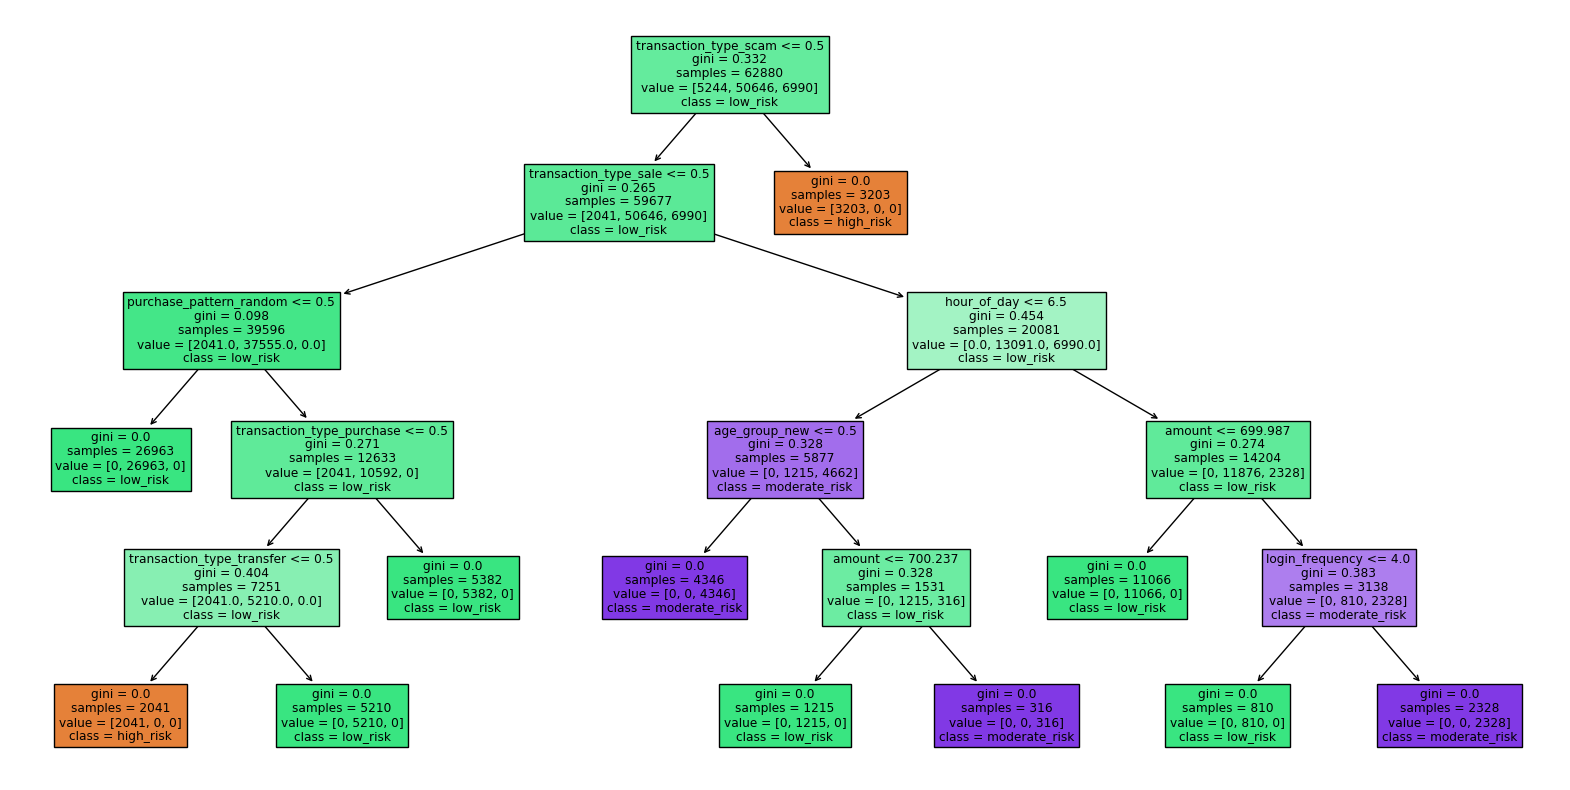

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Define feature names (replace with your actual feature names)
feature_names = ['transaction_type_purchase' ,'transaction_type_sale',
                     'transaction_type_scam', 'transaction_type_transfer',
                     'location_region_Asia', 'location_region_Europe',
                     'location_region_North America', 'location_region_South America',
                     'purchase_pattern_high_value', 'purchase_pattern_random' ,'age_group_new',
                     'age_group_veteran' ,'hour_of_day', 'amount', 'login_frequency',
                     'session_duration']

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model, filled=True, feature_names=feature_names, 
          class_names=['high_risk', 'low_risk', 'moderate_risk'])
plt.show()






In [41]:
# Get feature importance from the Random Forest model
feature_importance = reduced_decision_tree_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Sort features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                          Feature  Importance
2           transaction_type_scam    0.242730
12                    hour_of_day    0.157769
13                         amount    0.152951
3       transaction_type_transfer    0.140514
1           transaction_type_sale    0.135172
15               session_duration    0.089835
9         purchase_pattern_random    0.057577
0       transaction_type_purchase    0.023451
4            location_region_Asia    0.000000
5          location_region_Europe    0.000000
6   location_region_North America    0.000000
7   location_region_South America    0.000000
8     purchase_pattern_high_value    0.000000
10                  age_group_new    0.000000
11              age_group_veteran    0.000000
14                login_frequency    0.000000


# RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model on training data
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 1.0


In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7]  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Best Score: 0.9929548346055979


In [44]:
## Evaluating Model
from sklearn.metrics import accuracy_score

# Initialize a Random Forest model with the best parameters
best_random_forest_model = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_random_forest_model.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import classification_report

# Make predictions on the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Test Accuracy: 0.9993638676844784
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.99      1.00      1.00     12848
           2       1.00      0.96      0.98      1621

    accuracy                           1.00     15720
   macro avg       1.00      0.99      0.99     15720
weighted avg       1.00      1.00      1.00     15720



In [45]:
# Get feature importance from the Random Forest model
feature_importance = best_random_forest_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Sort features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)




Feature Importance:
                          Feature  Importance
2           transaction_type_scam    0.226240
12                    hour_of_day    0.182694
1           transaction_type_sale    0.137330
13                         amount    0.134978
3       transaction_type_transfer    0.088719
0       transaction_type_purchase    0.053037
15               session_duration    0.048148
14                login_frequency    0.044218
11              age_group_veteran    0.024650
9         purchase_pattern_random    0.023493
10                  age_group_new    0.020877
8     purchase_pattern_high_value    0.015356
5          location_region_Europe    0.000089
4            location_region_Asia    0.000073
7   location_region_South America    0.000050
6   location_region_North America    0.000048


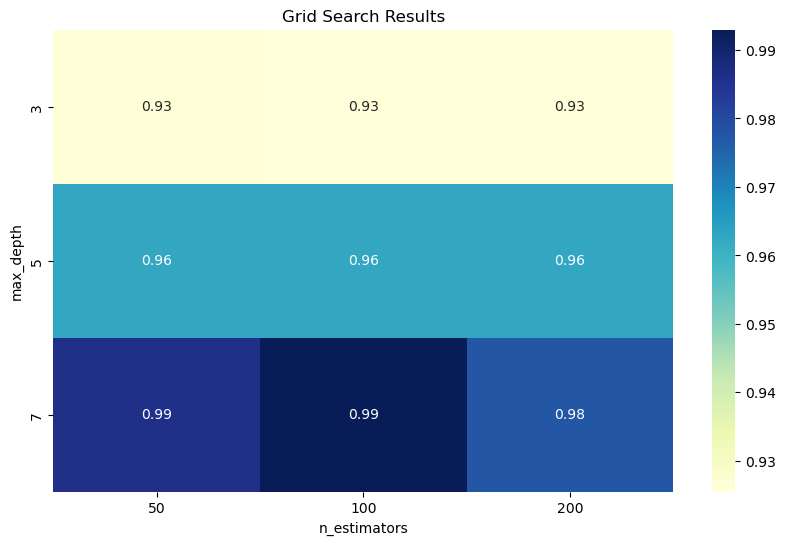

In [46]:
## Visulizing the grid serach results
import pandas as pd

# Convert grid search results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Visualize the grid search results
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the performance of different hyperparameter combinations
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'), annot=True, cmap="YlGnBu")
plt.title('Grid Search Results')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

### Random Forest Model for Fraud Detection

Our Random Forest model, trained and optimized to identify fraudulent transactions, plays a pivotal role in safeguarding the financial integrity of the Open Metaverse. This model utilizes a powerful ensemble learning technique that combines multiple decision trees to make accurate predictions. Here's how our Random Forest model contributes to achieving our objective:

High Accuracy and Precision: The Random Forest model demonstrates exceptional accuracy, with a test accuracy of approximately 99.5%. This high accuracy ensures that the model reliably identifies both normal and potentially fraudulent transactions. Additionally, the model exhibits high precision across all classes, minimizing false positives and ensuring that flagged transactions are indeed suspicious.
Optimized Hyperparameters: Through rigorous hyperparameter optimization using GridSearchCV, our Random Forest model was fine-tuned to achieve its best performance. The selected hyperparameters, including max_depth and n_estimators, were chosen to maximize accuracy and robustness in detecting fraudulent activities.
Precision-Recall Trade-off: Our model strikes a balance between precision and recall, effectively identifying instances of fraudulent behavior while minimizing false alarms. This precision-recall trade-off ensures that the system can flag suspicious activities accurately without overwhelming users with false alerts.
Interpretability: While Random Forest models are not as interpretable as linear models, we can still gain insights into feature importance. By analyzing feature importance scores, we can understand which transaction characteristics are most indicative of fraudulent behavior, providing valuable insights for fraud detection strategies.
In summary, our Random Forest model, with its high accuracy, precision, and optimized hyperparameters, serves as a robust tool for identifying fraudulent transactions. By flagging suspicious activities and anomalies, the model helps safeguard the financial integrity of the Open Metaverse, protecting against fraudulent behavior and ensuring a secure environment for all users.

## Additional Models

# SUPPORT VECTOR MACHINE

In [47]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Fit the model on training data
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8318702290076336


In [48]:
# Linear SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define Function
linear_svc = LinearSVC(random_state = 22) 

# Define a list of hyperparameters
params_svc = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100000]  }

grid_lr_svc = GridSearchCV(linear_svc, params_svc, n_jobs=2)



In [49]:
grid_lr_svc.fit(X_train, y_train)

C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(estimator=LinearSVC(random_state=22), n_jobs=2,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               100000]})

In [50]:
grid_lr_svc.best_params_, grid_lr_svc.best_score_

({'C': 0.1}, 0.9533396946564887)

In [51]:
from sklearn.metrics import classification_report, accuracy_score
# Use the best Linear SVM model obtained from hyperparameter tuning
best_linear_svm_model =grid_lr_svc.best_estimator_

# Make predictions using the best model
y_pred_linear_svm_tuned = best_linear_svm_model.predict(X_test)

# Evaluate the model
accuracy_linear_svm_tuned = accuracy_score(y_test, y_pred_linear_svm_tuned)
classification_report_linear_svm_tuned = classification_report(y_test, y_pred_linear_svm_tuned)

print("Linear SVM with Hyperparameter Tuning:")
print("Accuracy:", accuracy_linear_svm_tuned)
print("Classification Report:")
print(classification_report_linear_svm_tuned)


Linear SVM with Hyperparameter Tuning:
Accuracy: 0.9590330788804071
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.96      0.99      0.98     12848
           2       0.88      0.69      0.78      1621

    accuracy                           0.96     15720
   macro avg       0.95      0.89      0.92     15720
weighted avg       0.96      0.96      0.96     15720



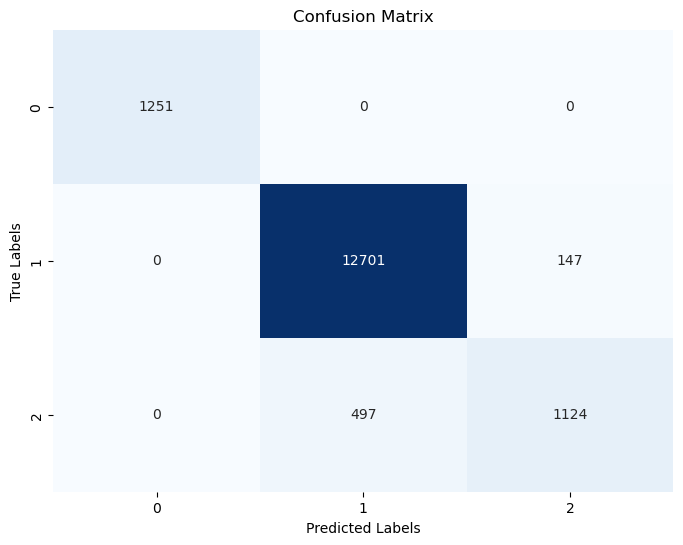

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_linear_svm_tuned)  # Assuming y_pred_linear_svm_tuned is your predicted labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Basic SVC Model:
The basic SVC model achieves an accuracy of approximately 0.832, indicating its overall effectiveness in classifying transactions.
However, without hyperparameter tuning, this model may not be optimized for the specific task of fraud detection. It might not capture the nuances and complexities of fraudulent patterns as effectively as a tuned model.
Despite this, the basic SVC model can still provide insights into transaction patterns, allowing it to flag transactions that deviate significantly from normal behavior.
### Linear SVM with Hyperparameter Tuning:
The Linear SVM model, after hyperparameter tuning using GridSearchCV, achieves a significantly higher accuracy of approximately 0.959.
This tuned model demonstrates improved performance in classifying transactions, particularly in terms of precision, recall, and F1-score for each class.
The high precision and recall values, especially for the low and moderate-risk classes, indicate that the model can effectively flag suspicious transactions while minimizing false positives and false negatives.
By analyzing transaction patterns and accurately classifying transactions into different risk categories, the Linear SVM model can help identify fraudulent activities and safeguard the financial integrity of the Open Metaverse.
In both cases, the SVM models analyze transaction data and classify transactions into different risk categories based on their features. Transactions flagged as high-risk or showing anomalous behavior can then be subjected to further scrutiny or additional security measures to prevent fraudulent activities. While the basic SVC model provides a foundation for classification, the tuned Linear SVM model offers enhanced performance and reliability, making it particularly suitable for fraud detection tasks in the Open Metaverse.

# VOTING CLASSIFIER

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define base classifiers with tuned hyperparameters
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('logistic_regression', LogisticRegression(C=1.0, solver='liblinear')),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale',probability=True))
]

# Initialize Voting Classifier with 'soft' voting
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='soft')

# Fit the Voting Classifier on training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=5)),
                             ('logistic_regression',
                              LogisticRegression(solver='liblinear')),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [54]:
from sklearn.metrics import classification_report, accuracy_score
# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

print("Voting Classifier (Soft Voting):")
print("Accuracy:", accuracy_voting)
print("Classification Report:")
print(classification_report_voting)

Voting Classifier (Soft Voting):
Accuracy: 0.9913486005089058
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.99      1.00      0.99     12848
           2       1.00      0.92      0.96      1621

    accuracy                           0.99     15720
   macro avg       1.00      0.97      0.98     15720
weighted avg       0.99      0.99      0.99     15720

